# Read the data
- Tuberculosis prevalence per 100,000: 인구 십만 명 당 결핵 유병률

In [1]:
import pandas as pd
import numpy as np

In [2]:
tb_file = './data/Tuberculosis_prevalence_per_100000.csv'

In [3]:
tb = pd.read_csv(tb_file, index_col=0)
tb.index.names = ['TB_prevalence']
tb.columns.names = ['years']

In [4]:
tb.head(10)

years,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
TB_prevalence,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19
Angola,514,514,513,512,510,508,512,363,414,384,530,335,307,281,318,331,302,294
Anguilla,38,38,37,37,36,35,35,36,36,36,35,35,35,35,35,34,34,34
Antigua and Barbuda,16,15,15,14,13,12,12,11,11,9,8,9,7,9,8,8,9,9
Argentina,96,91,86,82,78,74,71,67,63,58,52,51,42,41,39,39,37,35


In [5]:
tb.shape

(207, 18)

In [6]:
tb.dtypes

years
1990    int64
1991    int64
1992    int64
1993    int64
1994    int64
1995    int64
1996    int64
1997    int64
1998    int64
1999    int64
2000    int64
2001    int64
2002    int64
2003    int64
2004    int64
2005    int64
2006    int64
2007    int64
dtype: object

# Dimensionality reduction with PCA

## Applying full PCA

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA()

In [9]:
pca.fit(tb)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
tb_transformed = pca.transform(tb)

In [11]:
print(type(tb))
print(type(tb_transformed))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [12]:
print(tb.shape)
print(tb_transformed.shape)

(207, 18)
(207, 18)


In [13]:
tb.head(3)

years,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
TB_prevalence,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56


In [14]:
print(tb_transformed[0:3, :])

[[ 7.32215864e+02  2.03381494e+02 -9.13862545e+01  4.10127307e+00
   8.74719226e-01  2.75762209e-01 -3.14220925e+00 -1.28100948e+01
  -1.25145477e+01  3.08426275e+00 -1.47199248e+01 -5.83998200e+00
  -5.83893966e+00  7.92972793e+00 -3.96692024e+00  2.49757116e+00
  -3.92077319e+00  2.06654116e-01]
 [-6.13296510e+02  4.71597812e+00  3.72361960e+00 -5.49766312e+00
   1.97040530e+00 -1.05777634e+00 -4.33421353e+00  1.63331293e+00
  -1.16297560e+00  2.72054021e+00 -1.52074260e+00 -1.03493320e-01
  -7.98260696e-01 -3.45024315e-01  7.31177598e-01  2.70057294e+00
  -7.12621677e-01  3.53581676e-01]
 [-5.69303713e+02 -3.68370510e+01  2.29740943e+01 -7.07738171e+00
  -2.34222254e+00  1.69515796e+00  1.56188019e+00  5.41399602e+00
   3.39644693e-01  1.19848660e+00  6.95673492e-01 -3.18448790e-01
   8.50216876e-01  2.78871201e-01  8.63829619e-01  1.23621801e-01
   1.34928332e+00  9.02033059e-03]]


In [15]:
# Check PCs (principal components) in feature space
print(pca.components_)

[[ 0.25583801  0.25470394  0.25141064  0.24772801  0.24449817  0.24141272
   0.2202353   0.21919471  0.2165391   0.22204506  0.22879832  0.23376061
   0.23077592  0.23574534  0.23472456  0.23435384  0.23355341  0.23217055]
 [ 0.33830021  0.31393233  0.29277268  0.26949215  0.23778166  0.20993393
   0.1208106   0.07301764  0.01743088 -0.05608852 -0.10059987 -0.16723358
  -0.20135595 -0.26801844 -0.27958111 -0.29766788 -0.29587202 -0.31605565]
 [ 0.21173678  0.19947646  0.16503796  0.13834831  0.09589133  0.08307471
  -0.33694565 -0.39096353 -0.36159386 -0.38854564 -0.2744374  -0.20637544
   0.00903455  0.05889389  0.15128125  0.18364686  0.2286671   0.27284063]
 [-0.11281578  0.07528974 -0.04094747 -0.0141431  -0.08435143  0.06896131
   0.26840268  0.0857293  -0.08495182 -0.21957133 -0.26097113 -0.19373341
   0.80089863  0.12548713  0.03801165 -0.10040738 -0.13331905 -0.2022719 ]
 [-0.19325162 -0.21047336 -0.16652062  0.18312556  0.5396415   0.18441198
  -0.2015502  -0.32385119 -0.29061

In [16]:
print(pca.components_.shape)

(18, 18)


In [17]:
# Amount of variance explained by each PC
print(pca.explained_variance_)

[7.27732116e+05 4.80003571e+04 8.56479470e+03 1.89483575e+03
 1.73622978e+03 1.30577359e+03 9.47251156e+02 6.32429620e+02
 5.03987826e+02 3.65781613e+02 2.54435572e+02 2.11368654e+02
 1.92463737e+02 1.24446771e+02 8.59753028e+01 5.61020208e+01
 3.33328758e+01 1.89371467e+01]


In [18]:
# Percentage of variance explained by each PC
print(pca.explained_variance_ratio_)

[9.18087891e-01 6.05560009e-02 1.08051220e-02 2.39047545e-03
 2.19038229e-03 1.64732996e-03 1.19502740e-03 7.97856744e-04
 6.35817920e-04 4.61460559e-04 3.20989293e-04 2.66657191e-04
 2.42807240e-04 1.56998807e-04 1.08464204e-04 7.07768488e-05
 4.20518883e-05 2.38906112e-05]


In [19]:
tb_transformed[:, 0:2]

array([[ 7.32215864e+02,  2.03381494e+02],
       [-6.13296510e+02,  4.71597812e+00],
       [-5.69303713e+02, -3.68370510e+01],
       [-7.17082766e+02,  5.46469555e+00],
       [-6.61802241e+02,  1.10377364e+01],
       [ 9.90536338e+02,  2.94243725e+02],
       [-6.18891169e+02, -1.45029279e+01],
       [-7.23656796e+02, -5.37125754e+00],
       [-5.08244158e+02,  6.10397004e+01],
       [-4.54552060e+02, -7.89863744e+01],
       [-7.42575408e+02, -1.37488238e+01],
       [-7.15906806e+02, -5.96921991e+00],
       [-4.10215266e+02, -8.35107570e+01],
       [-5.53237930e+02, -1.37877397e+01],
       [-4.43480516e+02,  7.75855551e+01],
       [ 1.42280060e+03,  2.42722083e+02],
       [-7.47393482e+02, -9.33538066e+00],
       [-4.32631571e+02, -3.96933543e+01],
       [-7.15779552e+02, -8.73209243e+00],
       [-5.65111003e+02,  1.40605932e+01],
       [-2.08237408e+02, -3.16580516e+01],
       [-7.38452782e+02, -1.01653102e+01],
       [ 1.74270925e+03,  5.69448954e+02],
       [ 3.

## Applying reduced PCA

In [20]:
pca_reduced = PCA(n_components=2)

In [21]:
tb_2d = pca_reduced.fit_transform(tb)

In [22]:
print(tb.shape)
print(tb_2d.shape)

(207, 18)
(207, 2)


In [23]:
tb_2d

array([[ 7.32215864e+02,  2.03381494e+02],
       [-6.13296510e+02,  4.71597812e+00],
       [-5.69303713e+02, -3.68370510e+01],
       [-7.17082766e+02,  5.46469555e+00],
       [-6.61802241e+02,  1.10377364e+01],
       [ 9.90536338e+02,  2.94243725e+02],
       [-6.18891169e+02, -1.45029279e+01],
       [-7.23656796e+02, -5.37125754e+00],
       [-5.08244158e+02,  6.10397004e+01],
       [-4.54552060e+02, -7.89863744e+01],
       [-7.42575408e+02, -1.37488238e+01],
       [-7.15906806e+02, -5.96921991e+00],
       [-4.10215266e+02, -8.35107570e+01],
       [-5.53237930e+02, -1.37877397e+01],
       [-4.43480516e+02,  7.75855551e+01],
       [ 1.42280060e+03,  2.42722083e+02],
       [-7.47393482e+02, -9.33538066e+00],
       [-4.32631571e+02, -3.96933543e+01],
       [-7.15779552e+02, -8.73209243e+00],
       [-5.65111003e+02,  1.40605932e+01],
       [-2.08237408e+02, -3.16580516e+01],
       [-7.38452782e+02, -1.01653102e+01],
       [ 1.74270925e+03,  5.69448954e+02],
       [ 3.

In [24]:
tb_transformed[:, 0:2]

array([[ 7.32215864e+02,  2.03381494e+02],
       [-6.13296510e+02,  4.71597812e+00],
       [-5.69303713e+02, -3.68370510e+01],
       [-7.17082766e+02,  5.46469555e+00],
       [-6.61802241e+02,  1.10377364e+01],
       [ 9.90536338e+02,  2.94243725e+02],
       [-6.18891169e+02, -1.45029279e+01],
       [-7.23656796e+02, -5.37125754e+00],
       [-5.08244158e+02,  6.10397004e+01],
       [-4.54552060e+02, -7.89863744e+01],
       [-7.42575408e+02, -1.37488238e+01],
       [-7.15906806e+02, -5.96921991e+00],
       [-4.10215266e+02, -8.35107570e+01],
       [-5.53237930e+02, -1.37877397e+01],
       [-4.43480516e+02,  7.75855551e+01],
       [ 1.42280060e+03,  2.42722083e+02],
       [-7.47393482e+02, -9.33538066e+00],
       [-4.32631571e+02, -3.96933543e+01],
       [-7.15779552e+02, -8.73209243e+00],
       [-5.65111003e+02,  1.40605932e+01],
       [-2.08237408e+02, -3.16580516e+01],
       [-7.38452782e+02, -1.01653102e+01],
       [ 1.74270925e+03,  5.69448954e+02],
       [ 3.

In [25]:
print(pca.explained_variance_ratio_)
print(pca_reduced.explained_variance_ratio_)

[9.18087891e-01 6.05560009e-02 1.08051220e-02 2.39047545e-03
 2.19038229e-03 1.64732996e-03 1.19502740e-03 7.97856744e-04
 6.35817920e-04 4.61460559e-04 3.20989293e-04 2.66657191e-04
 2.42807240e-04 1.56998807e-04 1.08464204e-04 7.07768488e-05
 4.20518883e-05 2.38906112e-05]
[0.91808789 0.060556  ]


In [27]:
tb_2d = pd.DataFrame(tb_2d)
tb_2d.index = tb.index
tb_2d.columns = ['PC1', 'PC2']
tb_2d.head(5)

,PC1,PC2
TB_prevalence,,
Afghanistan,732.215864,203.381494
Albania,-613.296510,4.715978
Algeria,-569.303713,-36.837051
American Samoa,-717.082766,5.464696
Andorra,-661.802241,11.037736


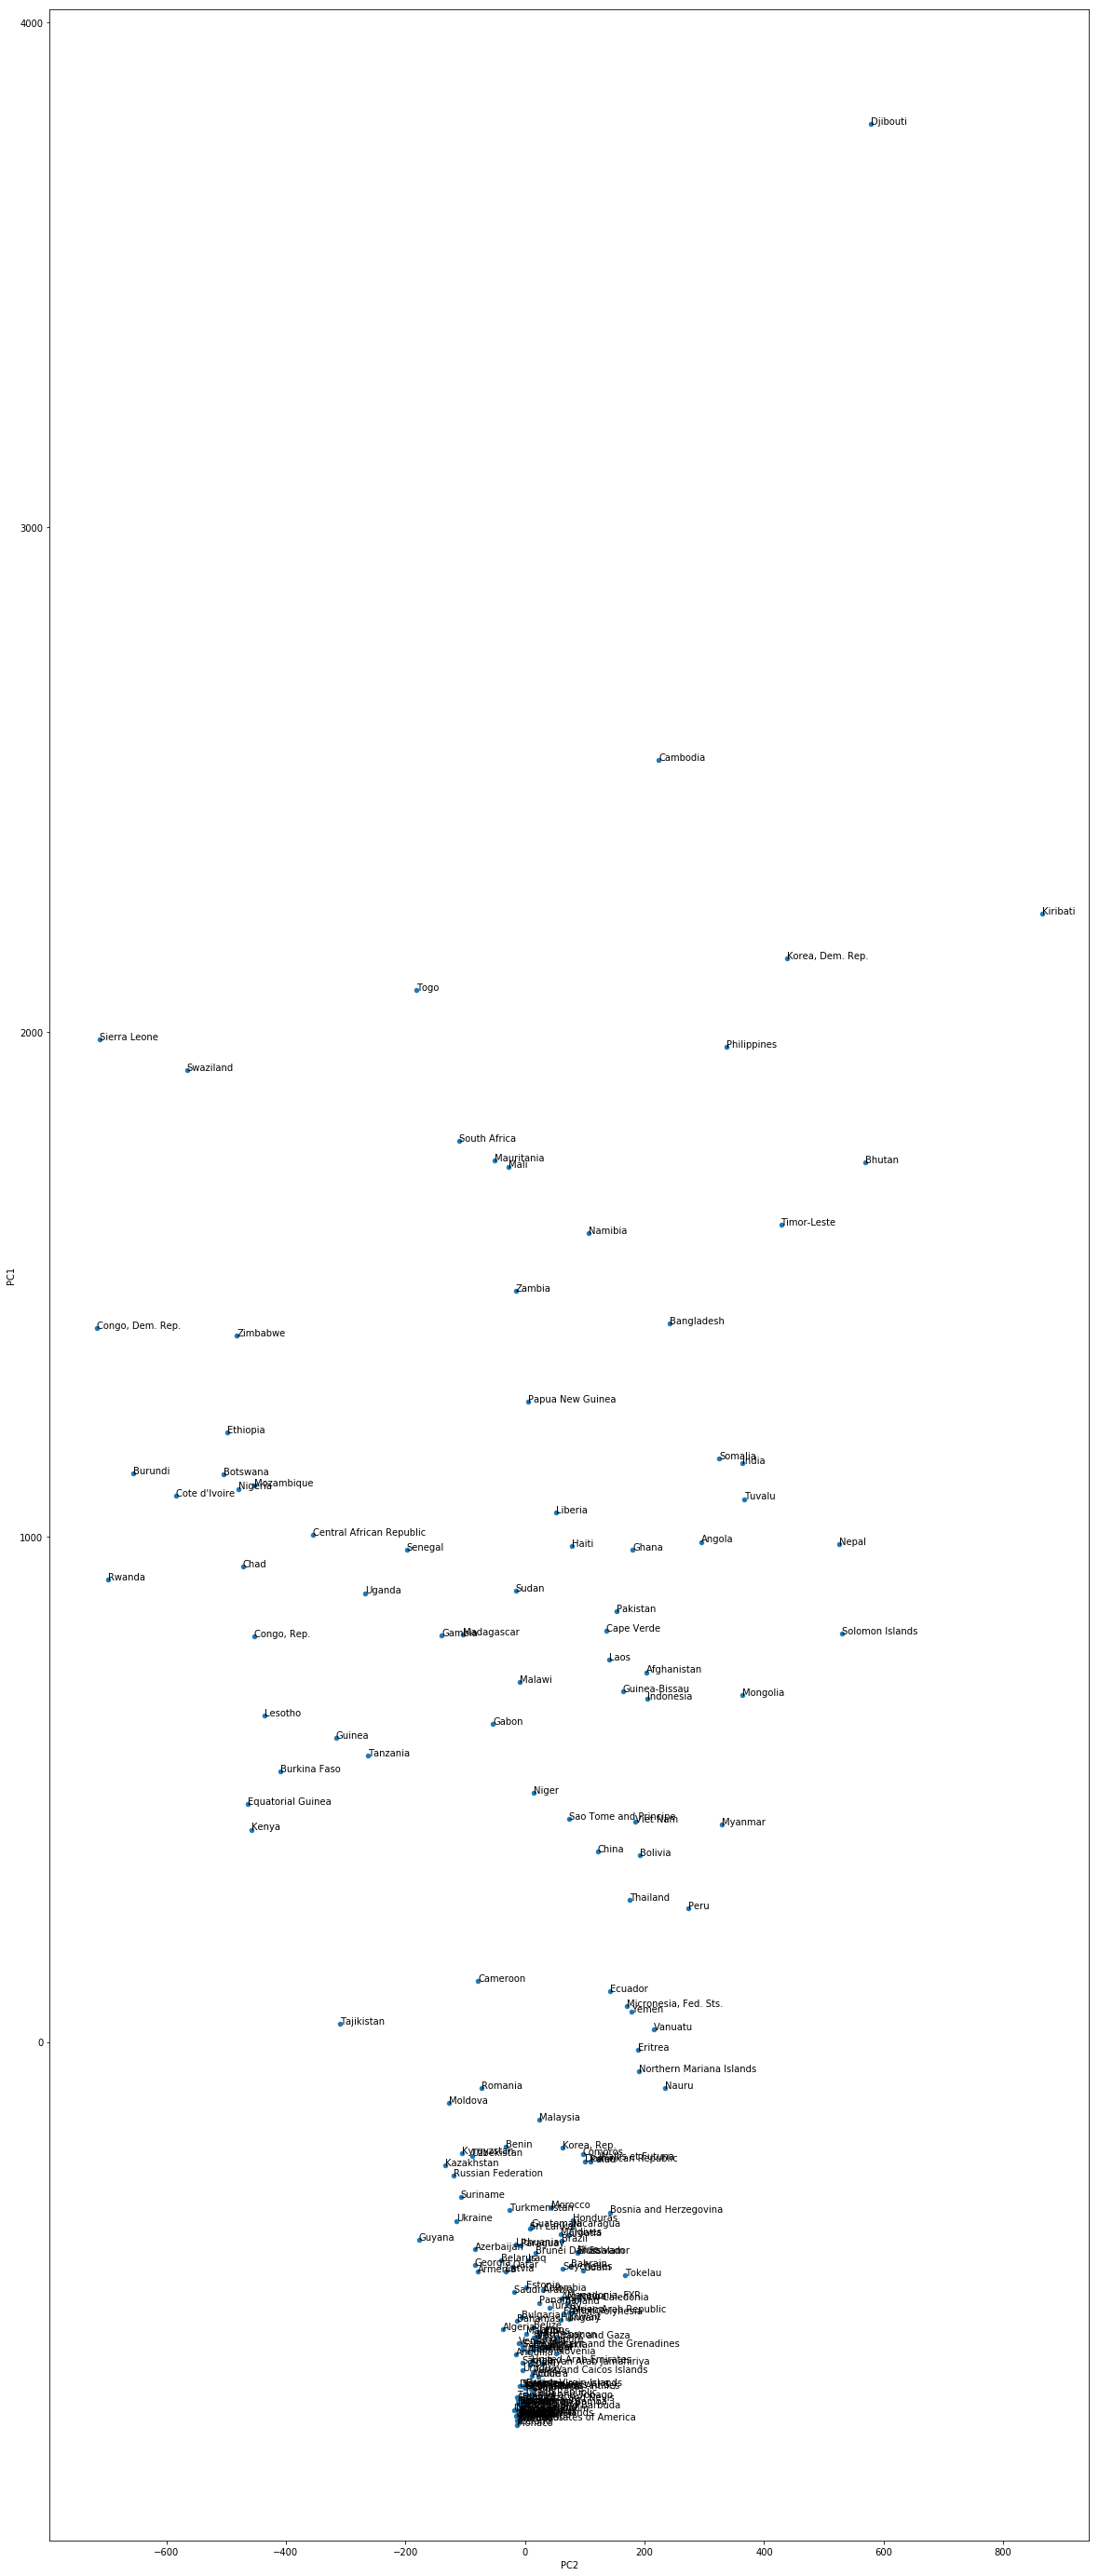

In [28]:
%matplotlib inline

ax = tb_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(20, 50))

for i, country in enumerate(tb_2d.index):
    ax.annotate(country, (tb_2d.iloc[i].PC2, tb_2d.iloc[i].PC1))

# A demo of K-Means clustering on the handwritten digits data
- Borrowed from `scikit-learn.org`
- http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

In [29]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.16s	69432	0.602	0.650	0.625	0.465	0.598	0.146
random   	0.14s	69694	0.669	0.710	0.689	0.553	0.666	0.147
PCA-based	0.03s	70804	0.671	0.698	0.684	0.561	0.668	0.118
__________________________________________________________________________________


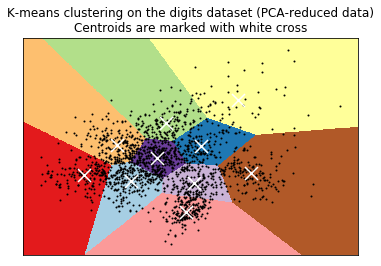

In [30]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()